In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("/content/Criminal Offences_Assaults_new.xlsx")
df.head(3)

,X,Y,OBJECTID,YEAR,REP_DATE,REP_DATE_FORMATTED,REP_HOUR,REP_HOUR_FORMATTED,OCC_DATE,OCC_DATE_FORMATTED,...,WEEKDAY,OFF_SUM,OFF_CATEG,NB_NAME_EN,SECTOR,SECTOR_FORMATTED,Unnamed: 18,Unnamed: 19,DIVISION,CENSUS_TRC
0,-75.601681,45.438292,17,2022,2022/06/04 05:00:00+00,2022-06-04,900,12:00:00,2022/06/04 05:00:00+00,2022-06-04,...,Saturday,Crimes Against Person (1000),Assaults,Beacon Hill South - Cardinal Heights,Sector 32,Sector 32,NaN,NaN,East,5050121.02
1,-75.595101,45.442037,25,2022,2022/02/17 05:00:00+00,2022-02-17,600,00:00:00,2022/02/17 05:00:00+00,2022-02-17,...,Thursday,Crimes Against Person (1000),Assaults,Beacon Hill South - Cardinal Heights,Sector 32,Sector 32,NaN,NaN,East,5050121.02
2,-75.595101,45.442037,31,2022,2022/06/27 05:00:00+00,2022-06-27,200,08:00:00,2022/06/27 05:00:00+00,2022-06-27,...,Monday,Crimes Against Person (1000),Assaults,Beacon Hill South - Cardinal Heights,Sector 32,Sector 32,NaN,NaN,East,5050121.02


In [3]:
df['SECTOR_FORMATTED'].value_counts()

Sector 24    2997
Sector 25    1735
Sector 23    1669
Sector 21    1346
Sector 31    1148
Sector 13    1077
Sector 14    1034
Sector 32    1017
Sector 22     972
Sector 33     946
Sector 34     928
Sector 35     877
Sector 17     868
Sector 16     760
Sector 15     692
Sector 36     164
Sector 12     157
Sector 11     150
Sector 37     128
Name: SECTOR_FORMATTED, dtype: int64

In [4]:
import sklearn
print(sklearn.__version__)

1.2.2


In [5]:
print("Shape of the dataframe: ", df.shape)

Shape of the dataframe:  (18665, 22)


In [6]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'YEAR', 'REP_DATE', 'REP_DATE_FORMATTED',
       'REP_HOUR', 'REP_HOUR_FORMATTED', 'OCC_DATE', 'OCC_DATE_FORMATTED',
       'OCC_HOUR', 'OCC_HOUR_FORMATTED', 'WEEKDAY', 'OFF_SUM', 'OFF_CATEG',
       'NB_NAME_EN', 'SECTOR', 'SECTOR_FORMATTED', 'Unnamed: 18',
       'Unnamed: 19', 'DIVISION', 'CENSUS_TRC'],
      dtype='object')

In [7]:
df.drop(columns=['Unnamed: 18', 'Unnamed: 19'], inplace=True)

In [8]:
df.drop(columns=['YEAR', 'REP_DATE', 'REP_DATE_FORMATTED','REP_HOUR','REP_HOUR_FORMATTED','OCC_DATE','OCC_HOUR','OCC_HOUR_FORMATTED','WEEKDAY','SECTOR','OFF_CATEG','OFF_SUM',"OBJECTID"], inplace=True)

In [9]:
df['DIVISION'].value_counts()

Central    8717
East       5211
West       4737
Name: DIVISION, dtype: int64

In [10]:
df.head(3)

,X,Y,OCC_DATE_FORMATTED,NB_NAME_EN,SECTOR_FORMATTED,DIVISION,CENSUS_TRC
0,-75.601681,45.438292,2022-06-04,Beacon Hill South - Cardinal Heights,Sector 32,East,5050121.02
1,-75.595101,45.442037,2022-02-17,Beacon Hill South - Cardinal Heights,Sector 32,East,5050121.02
2,-75.595101,45.442037,2022-06-27,Beacon Hill South - Cardinal Heights,Sector 32,East,5050121.02


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18665 entries, 0 to 18664
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   X                   18665 non-null  float64       
 1   Y                   18665 non-null  float64       
 2   OCC_DATE_FORMATTED  18665 non-null  datetime64[ns]
 3   NB_NAME_EN          18621 non-null  object        
 4   SECTOR_FORMATTED    18665 non-null  object        
 5   DIVISION            18665 non-null  object        
 6   CENSUS_TRC          18665 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 1020.9+ KB


In [12]:
df.shape

(18665, 7)

In [13]:
df.skew()

<ipython-input-13-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


X            -0.734272
Y            -1.239795
CENSUS_TRC    0.914296
dtype: float64

In [14]:
df.tail(5)

,X,Y,OCC_DATE_FORMATTED,NB_NAME_EN,SECTOR_FORMATTED,DIVISION,CENSUS_TRC
18660,-75.652530,45.435513,2020-10-01,Overbrook - McArthur,Sector 25,Central,5050100.0
18661,-75.652530,45.435513,2020-10-02,Overbrook - McArthur,Sector 25,Central,5050100.0
18662,-75.652530,45.435513,2020-07-12,Overbrook - McArthur,Sector 25,Central,5050100.0
18663,-75.647034,45.435508,2019-03-14,Overbrook - McArthur,Sector 25,Central,5050061.0
18664,-75.647034,45.435508,2019-05-08,Overbrook - McArthur,Sector 25,Central,5050061.0


In [15]:
df['CENSUS_TRC'].value_counts()

5050054.00    1376
5050056.00     646
5050038.00     489
5050053.00     457
5050048.00     395
              ... 
5050160.09      11
5050002.04       8
5050140.06       7
5050110.00       6
5050140.01       2
Name: CENSUS_TRC, Length: 196, dtype: int64

In [16]:
df=df.dropna()

In [17]:
df.shape

(18621, 7)

In [18]:
df.duplicated().sum()

340

In [19]:
df=df.drop_duplicates()

# **Model fitting**

In [20]:
df = df.sort_values('OCC_DATE_FORMATTED').reset_index(drop=True)

In [21]:
df.head()

,X,Y,OCC_DATE_FORMATTED,NB_NAME_EN,SECTOR_FORMATTED,DIVISION,CENSUS_TRC
0,-75.530969,45.471290,1982-08-04,Convent Glen - Orléans Woods,Sector 31,East,5050124.01
1,-75.699659,45.407183,1984-02-14,Centretown,Sector 23,Central,5050039.00
2,-75.801116,45.357766,1989-05-13,Bayshore - Belltown,Sector 14,West,5050029.00
3,-75.686892,45.412825,1989-07-01,Centretown,Sector 23,Central,5050037.00
4,-75.780401,45.330367,1991-05-08,Woodvale - Craig Henry - Manordale - Estates o...,Sector 15,West,5050135.01


## **Split occured date into date,month,column**

In [22]:
df['OCC_YEAR'] = df['OCC_DATE_FORMATTED'].dt.year
df['OCC_DAY'] = df['OCC_DATE_FORMATTED'].dt.day
df['OCC_MONTH'] = df['OCC_DATE_FORMATTED'].dt.month
df.drop(columns=['OCC_DATE_FORMATTED'], inplace=True)

## **Import necessary liabraries**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import  RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler


## **Train Test Split**

In [24]:
X = df[['X', 'Y', 'SECTOR_FORMATTED', 'DIVISION', 'CENSUS_TRC','OCC_YEAR', 'OCC_DAY', 'OCC_MONTH'	]]
Y = df[["NB_NAME_EN"]]  # Targets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [26]:
Y_test.head(3)

,NB_NAME_EN
2157,Centretown
14313,Hunt Club Upper -Blossom Park - Timbermill
6206,Byward Market


In [25]:
X_test.head(3)

,X,Y,SECTOR_FORMATTED,DIVISION,CENSUS_TRC,OCC_YEAR,OCC_DAY,OCC_MONTH
2157,-75.697374,45.409759,Sector 23,Central,5050039.00,2018,26,7
14313,-75.638216,45.345491,Sector 35,East,5050123.02,2021,13,12
6206,-75.692082,45.426990,Sector 24,Central,5050054.00,2019,30,8


### **Check Neighbors unique values**

In [ ]:
df['SECTOR_FORMATTED'].nunique()

19

## **Identify categorical and numerical columns**

In [ ]:
df.head(3)

,X,Y,NB_NAME_EN,SECTOR_FORMATTED,DIVISION,CENSUS_TRC,OCC_YEAR,OCC_DAY,OCC_MONTH
0,-75.530969,45.471290,Convent Glen - Orléans Woods,Sector 31,East,5050124.01,1982,4,8
1,-75.699659,45.407183,Centretown,Sector 23,Central,5050039.00,1984,14,2
2,-75.801116,45.357766,Bayshore - Belltown,Sector 14,West,5050029.00,1989,13,5


In [ ]:
categorical_cols = ['SECTOR_FORMATTED', 'DIVISION']
numerical_cols = ['X', 'Y', ,'CENSUS_TRC','OCC_DAY', 'OCC_MONTH','OCC_YEAR']

# **Create a column transformer with One-Hot Encoding and Scaling**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ])

# **Random Forest Clasifier**  

## **Create a pipeline**

In [ ]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

## **Fit the model**


In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['X', 'Y', 'OCC_YEAR',
                                                   'CENSUS_TRC', 'OCC_DAY',
                                                   'OCC_MONTH']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SECTOR_FORMATTED',
                                                   'DIVISION'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred1=model.predict(X_test)

## **Evalute the model with different metrics**

In [ ]:
accuracy1 = accuracy_score(Y_test, y_pred1)
precision1 = precision_score(Y_test, y_pred1, average='macro')
recall1 = recall_score(Y_test, y_pred1, average='macro')
f11 = f1_score(Y_test, y_pred1, average='macro')

# Print the metrics
print(f'Accuracy: {accuracy1}')
print(f'Precision: {precision1}')
print(f'Recall: {recall1}')
print(f'F1 Score: {f11}')

Accuracy: 0.9729286300246104
Precision: 0.9277789771752057
Recall: 0.919346615732285
F1 Score: 0.9214595529471481


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Confusion matrix**  

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred1)
print(f'Confusion Matrix:\n{conf_matrix}')


Confusion Matrix:
[[39  0  0 ...  0  0  0]
 [ 0 31  0 ...  0  0  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ... 50  0  0]
 [ 0  0  0 ...  0 59  0]
 [ 0  0  0 ...  0  0 18]]


# **Decision Tree Classifier**   

## **Pipeline for Decision Tree**

In [ ]:
dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [ ]:
dt.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['X', 'Y', 'OCC_YEAR',
                                                   'CENSUS_TRC', 'OCC_DAY',
                                                   'OCC_MONTH']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SECTOR_FORMATTED',
                                                   'DIVISION'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [ ]:
y_pred2=dt.predict(X_test)

# **Evalution**   

In [ ]:
accuracy2 = accuracy_score(Y_test, y_pred2)
precision2 = precision_score(Y_test, y_pred2, average='macro')
recall2 = recall_score(Y_test, y_pred2, average='macro')
f12 = f1_score(Y_test, y_pred2, average='macro')

# Print the metrics
print(f'Accuracy: {accuracy2}')
print(f'Precision: {precision2}')
print(f'Recall: {recall2}')
print(f'F1 Score: {f12}')

Accuracy: 0.979217938200711
Precision: 0.9309491616924058
Recall: 0.9316729696914787
F1 Score: 0.9281088457522172


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Confusion matrix**

In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred2)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[39  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ... 49  0  0]
 [ 0  0  0 ...  0 58  0]
 [ 0  0  0 ...  0  0 18]]


# **Logistic Classifier**  

In [ ]:
from sklearn.linear_model import LogisticRegression
log = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=0, multi_class='ovr'))  # or 'multinomial' for softmax approach
])

log.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['X', 'Y', 'OCC_YEAR',
                                                   'CENSUS_TRC', 'OCC_DAY',
                                                   'OCC_MONTH']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SECTOR_FORMATTED',
                                                   'DIVISION'])])),
                ('classifier',
                 LogisticRegression(multi_class='ovr', random_state=0))])

In [ ]:
y_pred3=log.predict(X_test)

## **Evalution metrics for logistic regression**

In [ ]:
accuracy3 = accuracy_score(Y_test, y_pred3)
precision3 = precision_score(Y_test, y_pred3, average='macro')
recall3 = recall_score(Y_test, y_pred3, average='macro')
f13 = f1_score(Y_test, y_pred3, average='macro')

# Print the metrics
print(f'Accuracy: {accuracy3}')
print(f'Precision: {precision3}')
print(f'Recall: {recall3}')
print(f'F1 Score: {f13}')

Accuracy: 0.6814328684714247
Precision: 0.5128118943114605
Recall: 0.49415774727484724
F1 Score: 0.46127214521914334


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred3)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[23  0  0 ...  0 16  0]
 [ 0 31  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 17  0  0]
 [ 0  0  0 ...  0 59  0]
 [ 0  0  0 ...  0  0 17]]


# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
sv = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))])
sv.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['X', 'Y', 'OCC_YEAR',
                                                   'CENSUS_TRC', 'OCC_DAY',
                                                   'OCC_MONTH']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SECTOR_FORMATTED',
                                                   'DIVISION'])])),
                ('classifier', SVC(random_state=42))])

In [ ]:
y_pred4=sv.predict(X_test)

# **Evalution**

In [ ]:
accuracy4 = accuracy_score(Y_test, y_pred4)
precision4 = precision_score(Y_test, y_pred4, average='macro')
recall4 = recall_score(Y_test, y_pred4, average='macro')
f14 = f1_score(Y_test, y_pred4, average='macro')

# Print the metrics
print(f'Accuracy: {accuracy4}')
print(f'Precision: {precision4}')
print(f'Recall: {recall4}')
print(f'F1 Score: {f14}')

Accuracy: 0.6844407984686902
Precision: 0.5134445883384405
Recall: 0.5117461637038933
F1 Score: 0.48169014493108747


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred4)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[23  0  0 ...  0 16  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 32  0  0]
 [ 0  0  0 ...  0 58  0]
 [ 0  0  0 ...  0  0 17]]


# **Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        random_state=42,
        n_estimators=100,      # Numbers for boosting stage
        learning_rate=0.1,     # Shrinks the contribution of each tree
        max_depth=3,           # Maximum depth of the individual regression estimators
        min_samples_split=2,   # Minimum number of samples required to split an internal node
        min_samples_leaf=1,    # Minimum number of samples required to be at a leaf node
        subsample=1.0,         # Fraction of samples to be used for fitting the individual base learners
        max_features=None      # Number of features to consider when looking for the best split
    ))
])


In [ ]:
#gb.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-47-aa61dd8e1546>", line 1, in <cell line: 1>
    gb.fit(X_train, Y_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 538, in fit
    n_stages = self._fit_stages(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 615, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 233, in _fit_stage
    residual = loss.negative_gradient(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb_losses.py", line 824, in negative_gradient
    np.exp(raw_predictions[:, k] - logsumexp(raw_

TypeError: object of type 'NoneType' has no len()

In [ ]:
y_pred4=gb.predict(X_test)

In [ ]:
accuracy5 = accuracy_score(Y_test, y_pred4)
precision5 = precision_score(Y_test, y_pred4, average='macro')
recall5 = recall_score(Y_test, y_pred4, average='macro')
f15 = f1_score(Y_test, y_pred4, average='macro')

# Print the metrics
print(f'Accuracy: {accuracy5}')
print(f'Precision: {precision5}')
print(f'Recall: {recall5}')
print(f'F1 Score: {f15}')

Accuracy: 0.04375170905113481
Precision: 0.08086285058801967
Recall: 0.04540359573895628
F1 Score: 0.04327655915722684


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
conf_matrix = confusion_matrix(Y_test, y_pred4)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
final_data=pd.DataFrame({'Models':['Random Forest','Decision Tree','Logistic Regression','SVM','Gradient Boosting'],
                        'Accuracy_score':[accuracy1,
                               accuracy2,
                               accuracy3,
                               accuracy4,
                               accuracy5],
                         'Precision_score':[
                             precision1,
                             precision2,
                             precision3,
                             precision4,
                             precision5
                         ],
                         'Recall Score':[
                             recall1,
                             recall2,
                             recall3,
                             recall4,
                             recall5
                         ],
                         'F1_score':[
                             f11,
                             f12,
                             f13,
                             f14,
                             f15
                         ]})

In [ ]:
final_data

,Models,Accuracy_score,Precision_score,Recall Score,F1_score
0,Random Forest,0.968553,0.935539,0.917130,0.921884
1,Decision Tree,0.977577,0.936314,0.939312,0.933813
2,Logistic Regression,0.647525,0.494823,0.453011,0.436976
3,SVM,0.685808,0.538265,0.524150,0.497863
4,Gradient Boosting,0.043752,0.080863,0.045404,0.043277


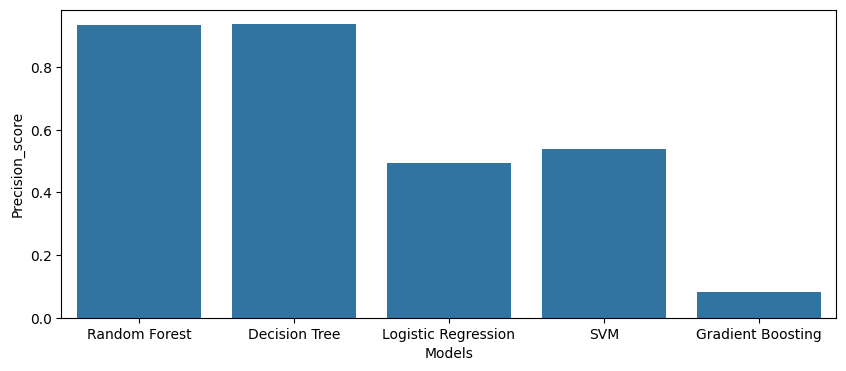

In [ ]:
plt.figure(figsize=(10, 4))

sns.barplot(data=final_data, x='Models', y='Precision_score')

plt.show()

# The precision score for random forest is high

# **Save the model**

In [ ]:
import pickle

# Save the model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)